In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import *
from scipy import stats
from scipy.stats import (median_test, mannwhitneyu)

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, auc)
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import (cross_val_score, cross_val_predict)
import pickle
from sklearn import preprocessing
%matplotlib inline
import pickle
from sklearn.externals.six import StringIO
import pydot
from __future__ import division
from sklearn import tree
from pandas.io.stata import StataReader

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
df = pickle.load( open( "final.p", "rb" ))

pd.set_option('max_columns', 30)

df = pickle.load( open( "final.p", "rb" ))
df['total'] = df['total'].apply(lambda x: str(x))
df['total'] = df['total'].apply(lambda x: x.replace('0', '1'))
df['total'] = df['total'].apply(lambda x: int(x))
df['unitemtotal'] = df['unitemtotal'].apply(lambda x: str(x))
df['unitemtotal'] = df['unitemtotal'].apply(lambda x: x.replace('0', '1'))
df['unitemtotal'] = df['unitemtotal'].apply(lambda x: int(x))
df['percunitem'] = df['unitemtotal']/df['total']
df['totalproxy'] = df['unitemproxy'] + df['itemproxy']
df['for'] = df['totalproxy'] + df['iefor']

In [4]:
pickle.dump( df, open( "final.p", "wb" ) )

In [3]:
df.columns

Index([u'ieagainst', u'iefor', u'itemagainst', u'itemfor', u'itemind', u'itempacs', u'itemproxy', u'proxyfor', u'unitemagainst', u'unitemfor', u'unitemind', u'unitempacs', u'unitemproxy', u'unitemtotal', u'itemtotal', u'total', u'unitemie', u'itemie', u'feccandid', u'winner', u'party', u'congyear', u'totalind', u'totalpacs', u'direct_total', u'direct_unitem', u'ind_total', u'ind_unitem', u'congdist', u'cpo', u'generalperc', u'percunitem', u'totalproxy', u'for'], dtype='object')

In [3]:
ei = df[df['congyear']==1]

vc = ei['congdist'].value_counts()
vc1 = pd.DataFrame(vc)
keep = vc1[vc1[0]==2]
eid = pd.merge(keep, ei, how='left', left_index=True, right_on = 'congdist')
win8 = eid[eid['winner']==1]
los8 = eid[eid['winner']==0]
tw = df[df['congyear']==3]
vc = tw['congdist'].value_counts()
vc1 = pd.DataFrame(vc)
keep = vc1[vc1[0]==2]
twd = pd.merge(keep, tw, how='left', left_index=True, right_on = 'congdist')
win12 =twd[twd['winner']==1]
los12 = twd[twd['winner']==0]
rep8 = eid[eid['party']==1]
dem8 = eid[eid['party']==0]
rep12 = tw[tw['party']==1]
dem12 = tw[tw['party']==0]
# res = pd.merge(win, los, on = 'feccandid', how ='outer')

    
temp = []
def larger():
    for row in res:
        if 'percunitem_x' > 'percunitem_y':
            temp.append('W')
        else:
            temp.append('L')
    return temp

# res['percunitem_x']
# res.tail()
# cols = eid[['congdist', 'percunitem']]
# gp = cols.groupby(['congdist'])
# gp['percunitem'].agg(np.max)

In [38]:
gp = df.groupby(['congyear'], as_index = False).sum()
gp
# gp['percunitemind'] = gp['unitemind']/gp['totalind']
# gp['percunitempac'] = gp['unitempacs']/gp['totalpacs']
# gp['percunitemagainst'] = gp['unitemagainst']/gp['ieagainst']
# gp['percunitemfor'] = gp['unitemfor']/gp['iefor']
# gp['percunitemdirect'] = gp['direct_unitem']/gp['direct_total']
# gp['percunitemind']= gp['ind_unitem']/gp['ind_total']
# gp_t= gp.transpose()
# gp_t['diff'] = gp_t[1]/gp_t[0]
# gp_t['diff'] = gp_t['diff'] - 1
# gp_t['diff'] = gp_t['diff'] * 100


,congyear,ieagainst,iefor,itemagainst,itemfor,itemind,itempacs,itemproxy,proxyfor,unitemagainst,unitemfor,unitemind,unitempacs,unitemproxy,unitemtotal,...,total,unitemie,itemie,winner,party,totalind,totalpacs,direct_total,direct_unitem,ind_total,ind_unitem,generalperc,percunitem,totalproxy,for
0,1,78923291,68717367,49590213,39227806,408697771,197171426,49589933,78922791,26946976,26281163,73745056,120824750,26946757,249179071,...,424826847,53227920,88817739,435,394,482442827,317996176,800439003,194569806,147640658,53228139,423.0900,553.507550,76536690,145254057
1,3,251576551,74356394,135662116,44590410,453029595,238194030,135348235,0,63252130,16929660,106335611,116355052,63253782,304476362,...,503033397,80183442,179938645,435,404,559365206,354549082,913914288,222690663,325932945,80181790,420.7407,562.395078,198602017,272958411


In [31]:
wins = df1[df1['winner'] ==1]
los = df1[df1['winner'] ==0]wins_gp = wins.groupby(['congyear']).mean()
wins_t = wins_gp.transpose()
wins_t['diff'] = wins_t[3.0]/wins_t[1.0]
wins_t['diff'] = wins_t['diff'] - 1
wins_t['diff'] = wins_t['diff'] * 100

los_gp = los.groupby(['congyear']).mean()
los_t = los_gp.transpose()
los_t['diff'] = los_t[3.0]/los_t[1.0]
los_t['diff'] = los_t['diff'] - 1
los_t['diff'] = los_t['diff'] * 100

SyntaxError: invalid syntax (<ipython-input-31-512b9652b7f1>, line 2)

In [52]:
# ope8['totalall'] = ope8['for'] + ope8['direct_total']
# ope12['totalall'] = ope12['for'] + ope12['direct_total']
# ope8['for'].mean()
ope8

,ieagainst,iefor,itemagainst,itemfor,itemind,itempacs,itemproxy,proxyfor,unitemagainst,unitemfor,unitemind,unitempacs,unitemproxy,unitemtotal,itemtotal,...,party,congyear,totalind,totalpacs,direct_total,direct_unitem,ind_total,ind_unitem,congdist,cpo,generalperc,percunitem,totalproxy,for,totalall
2,423573,214400,291959,103943,691958,325708,219386,347016,130969,80888,97022,138059,126156,442125,345103,...,1,1,788980,463767,1252747,235081,637973,211857,WY-1,O,0.53,0.561623,345542,559942,1812689
3,347016,446411,219386,307700,1295632,150809,291959,423573,126156,138030,256884,236578,130969,762461,505577,...,0,1,1552516,387387,1939903,493462,793427,264186,WY-1,O,0.43,0.601245,422928,869339,2809242
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,OH-11,O,0.15,1.000000,0,0,0
9,0,18747,0,13943,103519,75373,0,0,0,4799,50333,88983,0,144115,93782,...,0,1,153852,164356,318208,139316,18747,4799,OH-11,O,0.85,0.605787,0,18747,336955
79,51,788356,0,542703,1293331,168740,709007,973569,0,243449,93224,186023,263383,786179,692855,...,0,1,1386555,354763,1741318,279247,788407,243449,NM-2,O,0.56,0.531585,972390,1760746,3502064
80,973569,74289,709007,33823,1157235,0,0,51,263383,31771,0,0,0,31771,31771,...,1,1,1157235,0,1157235,0,1047858,295154,NM-2,O,0.44,0.500000,0,74289,1231524
106,945864,686878,597983,473413,1188019,471347,434801,630808,343865,212367,46498,369430,195046,823341,776843,...,0,1,1234517,840777,2075294,415928,1632742,556232,LA-4,O,0.48,0.511016,629847,1316725,3392019
107,630808,104788,434801,64366,481524,235839,597983,945864,195046,40270,29647,84104,343865,497886,468239,...,1,1,511171,319943,831114,113751,735596,235316,LA-4,O,0.48,0.515343,941848,1046636,1877750
122,0,101094,0,56250,977567,170048,0,0,0,23524,71041,190445,0,285111,213969,...,0,1,1048608,360493,1409101,261486,101094,23524,NM-3,O,0.57,0.571389,0,101094,1510195
123,0,6206,0,615,126712,31380,0,0,0,5591,25031,4609,0,35231,10200,...,1,1,151743,35989,187732,29640,6206,5591,NM-3,O,0.30,0.775484,0,6206,193938


In [39]:
ope8 = ei[ei['cpo'] =='O']
ope12 = tw[tw['cpo']=='O']

In [40]:
dic = {}
def get_totals(dataframe):
    dic['totalind.med'] = dataframe['totalind'].median()
    dic['totalind.std'] = dataframe['totalind'].std()
    dic['totalind.m'] = dataframe['totalind'].mean()
    dic['unitemind.med'] = dataframe['unitemind'].median()
    dic['unitemind.std'] = dataframe['unitemind'].std()
    dic['unitemind.m'] = dataframe['unitemind'].mean()
    dic['totalpacs.med'] = dataframe['totalpacs'].median()
    dic['totalpacs.std'] = dataframe['totalpacs'].std()
    dic['totalpacs.m'] = dataframe['totalpacs'].mean()
    dic['unitempacs.med'] = dataframe['unitempacs'].median()
    dic['unitempacs.std'] = dataframe['unitempacs'].std()
    dic['unitempacs.m'] = dataframe['unitempacs'].mean()
    dic['iefor.med'] = dataframe['iefor'].median()
    dic['iefor.std'] = dataframe['iefor'].std()
    dic['iefor.m'] = dataframe['iefor'].mean()
    dic['unitemfor.med'] = dataframe['unitemfor'].median()
    dic['unitemfor.std'] = dataframe['unitemfor'].std()
    dic['unitemfor.m'] = dataframe['unitemfor'].mean()
    dic['ieagainst.med'] = dataframe['ieagainst'].median()
    dic['ieagainst.std'] = dataframe['ieagainst'].std()
    dic['ieagainst.m'] = dataframe['ieagainst'].mean()
    dic['unitemagainst.med'] = dataframe['unitemagainst'].median()
    dic['unitemagainst.std'] = dataframe['unitemagainst'].std()
    dic['unitemagainst.m'] = dataframe['unitemagainst'].mean()
    dic['total.med'] = dataframe['total'].median()
    dic['total.std'] = dataframe['total'].std()
    dic['total.m'] = dataframe['total'].mean()
    dic['unitemtotal.med'] = dataframe['unitemtotal'].median()
    dic['unitemtotal.std'] = dataframe['unitemtotal'].std()
    dic['unitemtotal.m'] = dataframe['unitemtotal'].mean()
    return dic




eight= pd.DataFrame(get_totals(dataframe=ope8).items())
twelve= pd.DataFrame(get_totals(dataframe=ope12).items())
# lo12df= lo12df.rename(columns={1: 'los12'})
# lo12df = lo12df.set_index(0)
# wo12df = pd.DataFrame(wo12.items())
# wo12df= wo12df.rename(columns={1: 'los12'})
# wo12df = wo12df.set_index(0)
# res1 = pd.merge(winopen12_df, losopen12_df)
# winopen12_df = pd.DataFrame(temp.items())
# winopen12_df = winopen12_df.rename(columns={1: 'win12'})
merge = pd.merge(eight, twelve, left_on=0, right_on=0)
merge['diff'] = merge['1_y']- merge['1_x']
merge.sort(0)

,0,1_x,1_y,diff
28,ieagainst.m,367718.638889,313253.333333,-54465.305556
0,ieagainst.med,53676.000000,0.000000,-53676.000000
9,ieagainst.std,452804.184503,822116.651655,369312.467152
11,iefor.m,298859.013889,113584.616667,-185274.397222
14,iefor.med,95315.000000,14812.000000,-80503.000000
29,iefor.std,424631.358826,242033.544634,-182597.814192
8,total.m,905124.222222,513080.691667,-392043.530556
15,total.med,650662.500000,266726.000000,-383936.500000
1,total.std,877758.387693,757411.230350,-120347.157343
21,totalind.m,984136.972222,744693.125000,-239443.847222


In [152]:
inwo12 = tw[(tw['cpo'] == 'O') & (tw['winner']==1)]
inlo12 = tw[(tw['cpo'] == 'O') & (tw['winner']==0)]

In [74]:
# win8 = win8.set_index('congdist')
# win12 = win12.set_index('congdist')
# los8 = los8.set_index('congdist')
# los12 = los12.set_index('congdist')
win8 = win8.sort()
los8 = los8.sort()
win12 = win12.sort()
los12 = los12.sort()


,0,ieagainst,iefor,itemagainst,itemfor,itemind,itempacs,itemproxy,proxyfor,unitemagainst,unitemfor,unitemind,unitempacs,unitemproxy,unitemtotal,...,feccandid,winner,party,congyear,totalind,totalpacs,direct_total,direct_unitem,ind_total,ind_unitem,cpo,generalperc,percunitem,totalproxy,for
congdist,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK-1,2,0,727520,0,494700,1181666,125056,796726,1095501,0,220296,305396,124855,269812,921359,...,H8AK00108,0,0,1,1487062,249911,1736973,430251,727520,220296,C,0.45,0.600108,1066538,1794058
AL-2,2,642101,111639,442585,55135,915015,485386,374026,591618,198538,33173,35179,163460,215080,446892,...,H8AL02080,0,1,1,950194,648846,1599040,198639,753740,231711,O,0.50,0.520480,589106,700745
AL-3,2,0,53,0,0,897510,47227,0,0,0,0,74257,79669,0,153926,...,H8AL03047,0,0,1,971767,126896,1098663,153926,53,0,C,0.46,0.658944,0,53
AL-4,2,0,0,0,0,19100,71,0,0,0,0,250,429,0,679,...,H8AL04052,0,0,1,19350,500,19850,679,0,0,C,0.25,0.607335,0,0
AL-5,2,546167,64512,376460,30694,863899,469649,316013,499857,168875,33745,68376,104866,181721,388718,...,H4AL05025,0,1,1,932275,574515,1506790,173242,610679,202620,O,0.48,0.540531,497734,562246
AZ-1,2,1033107,53406,712096,5747,401483,124975,21,200,319437,40550,73170,50166,179,164165,...,H2AZ01149,0,1,1,474653,175141,649794,123336,1086513,359987,O,0.39,0.643883,200,53606
AZ-2,2,0,2491,0,1676,20203,708,0,0,0,813,17198,292,0,18313,...,H6AZ02155,0,0,1,37401,1000,38401,17490,2491,813,C,0.37,0.943094,0,2491
AZ-3,2,0,0,0,0,25450,0,711249,1061373,0,0,12466,0,319057,331523,...,H8AZ03100,0,0,1,37916,0,37916,12466,0,0,C,0.42,0.508798,1030306,1030306
AZ-4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,H2AZ04101,0,1,1,0,0,0,0,0,0,C,0.21,1.000000,0,0


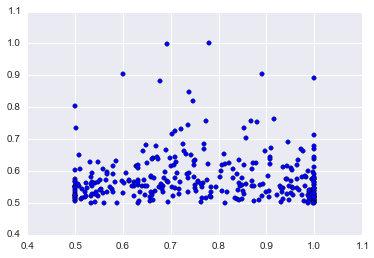

In [123]:
plt.scatter(los['percunitem'], win['percunitem'])

In [28]:
temp = []
for i, j in zip(win12['totalproxy'], los12['totalproxy']):
    if i > j:
        temp.append("winner_higher")
    else:
        temp.append("loser_higher")

In [29]:
temp.count('winner_higher')

46

In [97]:
# win12s = win12[['ieagainst']]
# win12s = win12s.rename(columns = {'ieagainst': 'percW'})
# los12s = los12[['ieagainst']]
# los12s = los12s.rename(columns = {'ieagainst': 'percL'})
# comp = pd.DataFrame(zip(win12s['percW'], los12s['percL']))
# comp['diff'] = comp[0]-comp[1]
# len(comp[comp['diff'] <0])

# win8s = win8[['ieagainst']]
# win8s = win8s.rename(columns = {'ieagainst': 'percW'})
# los8s = los8[['ieagainst']]
# los8s = los8s.rename(columns = {'ieagainst': 'percL'})
# comp = pd.DataFrame(zip(win8s['percW'], los8s['percL']))
# comp['diff'] = comp[0]-comp[1]
# len(comp[comp['diff'] <0])

rep12s = rep12[['ieagainst']]
rep12s = rep12s.rename(columns = {'ieagainst': 'percW'})
dem12s = dem12[['ieagainst']]
dem12s = dem12s.rename(columns = {'ieagainst': 'percL'})
comp = pd.DataFrame(zip(rep12s['percW'], dem12s['percL']))
comp['diff'] = comp[0]-comp[1]
# len(comp[comp['diff'] <0])


74